# Lab 4 


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, exposure

In [5]:
##img display
def show_gray_with_hist(img, title):
    fig, axes = plt.subplots(1, 2, figsize=(10, 4))

    # dispaly
    axes[0].imshow(img, cmap='gray')
    axes[0].set_title(title)
    axes[0].axis('off')

    axes[1].hist(img.ravel(), bins=256, range=(0, 255), color='black')
    axes[1].set_title('Histogram')
    axes[1].set_xlabel('Gray level')
    axes[1].set_ylabel('Pixel count')

    plt.tight_layout()
    plt.show()

## the steps: Thresholding

Apply fixed thresholds on a grayscale image.

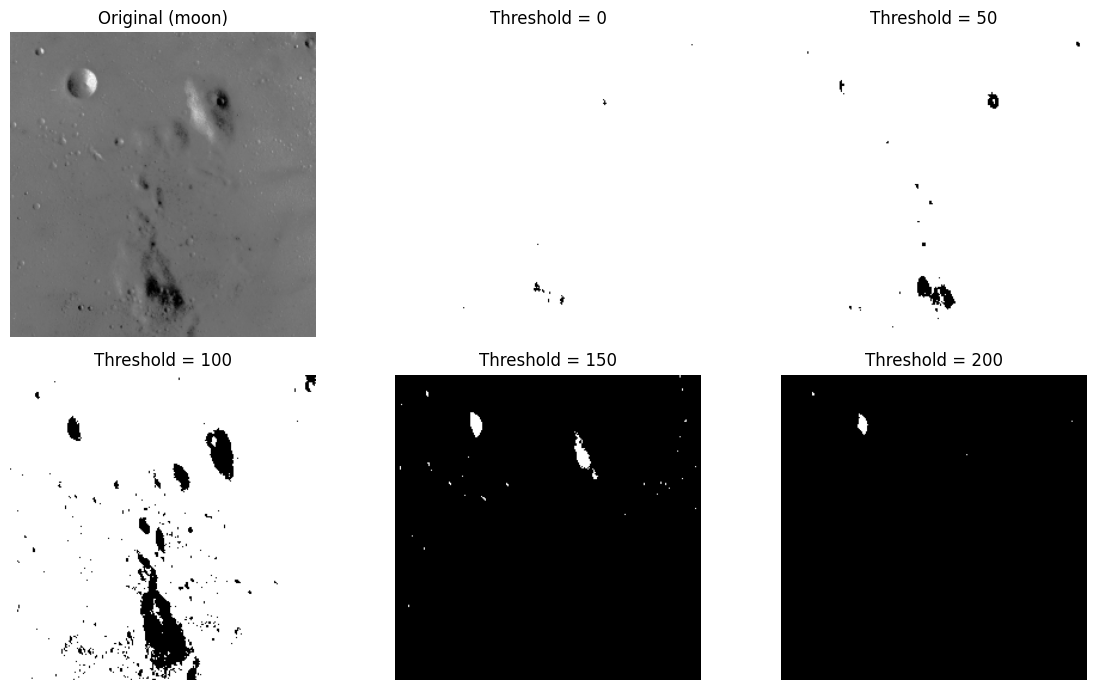

In [11]:
# Import the image
img = data.moon()

threshold_values = [0, 50, 100, 150, 200]

# make ready to display the original image + 5 thresholded results
fig, axes = plt.subplots(2, 3, figsize=(12, 7))
axes = axes.ravel()

# Display the original image
axes[0].imshow(img, cmap='gray')
axes[0].set_title('Original (moon)')
axes[0].axis('off')

# Apply thresholding for each value
for i, t in enumerate(threshold_values, start=1):
    # If pixel value  255 (white), otherwise  0 (black)
    thresh = np.where(img > t, 255, 0).astype(np.uint8)

    axes[i].imshow(thresh, cmap='gray')
    axes[i].set_title(f'Threshold = {t}')
    axes[i].axis('off')

plt.tight_layout()
plt.show()


## steps: Histogram Processing



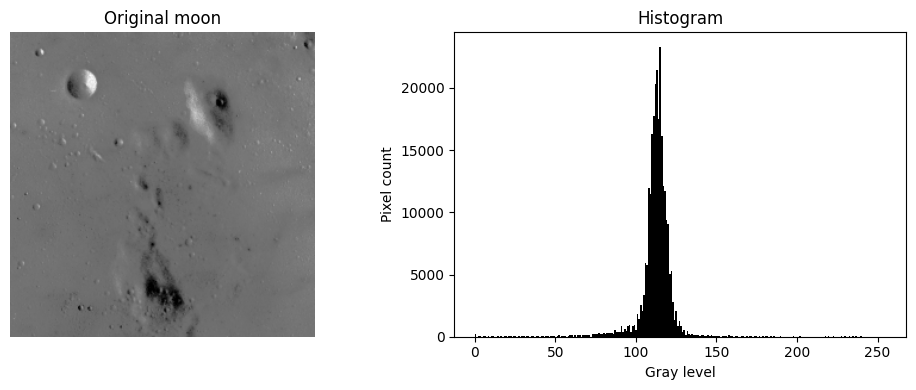

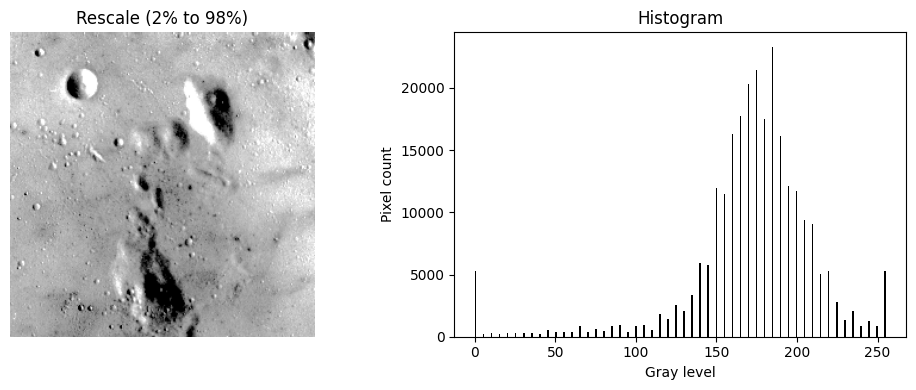

In [7]:
# Use the same moon image
img = data.moon()

# Compute the required percentiles (2% and 98%)
p2, p98 = np.percentile(img, (2, 98))

# Rescale intensity within the new range (Contrast Stretching)
img_rescale = exposure.rescale_intensity(img, in_range=(p2, p98))

# Display before and after + histogram
show_gray_with_hist(img, 'Original moon')
show_gray_with_hist(img_rescale, 'Rescale (2% to 98%)')


## Assessment Task 1

Using moon image rescale  within the 3rd and 80th percentiles and the plot histogram

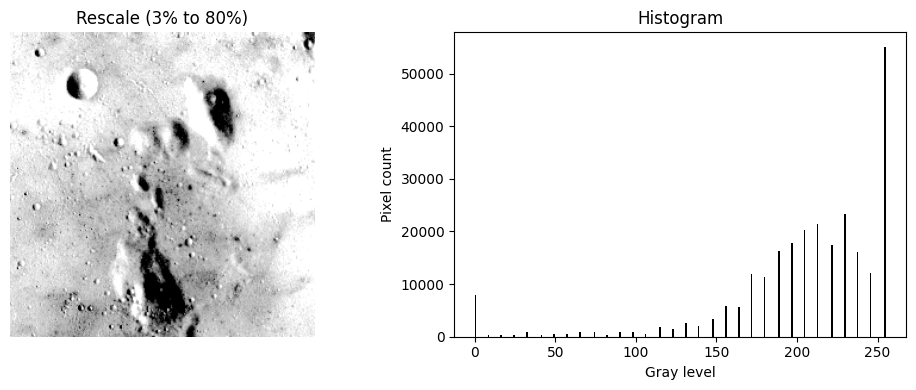

In [12]:
# Assessment Task 1
#the same idea but make it 3% to 80%
p3, p80 = np.percentile(img, (3, 80))
img_rescale_3_80 = exposure.rescale_intensity(img, in_range=(p3, p80))

show_gray_with_hist(img_rescale_3_80, 'Rescale (3% to 80%)')

## Assessment Task 2

Use `exposure.equalize_hist` and display the equalized image and  histogram

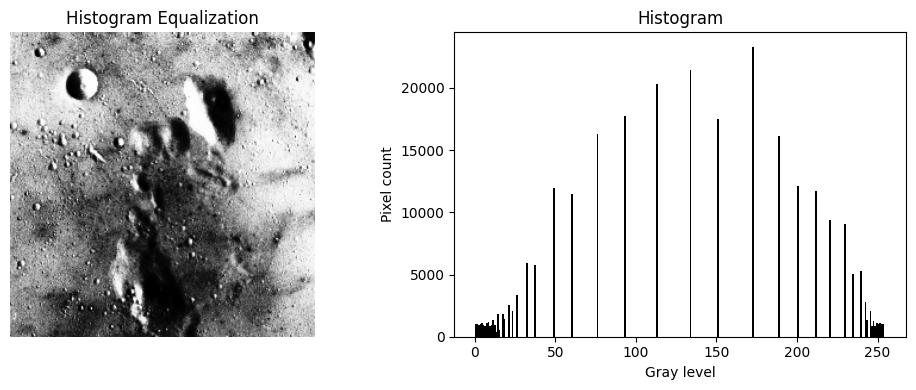

In [13]:
# Assessment Task 2
# (Histogram Equalization)
img_eq = exposure.equalize_hist(img)

# Convert to uint8 so the histogram range is 0 to 255
img_eq_u8 = (img_eq * 255).astype(np.uint8)

show_gray_with_hist(img_eq_u8, 'Histogram Equalization')


## Assessment Task 3

Histogram matching using `rocket` as reference and `chelsea` 

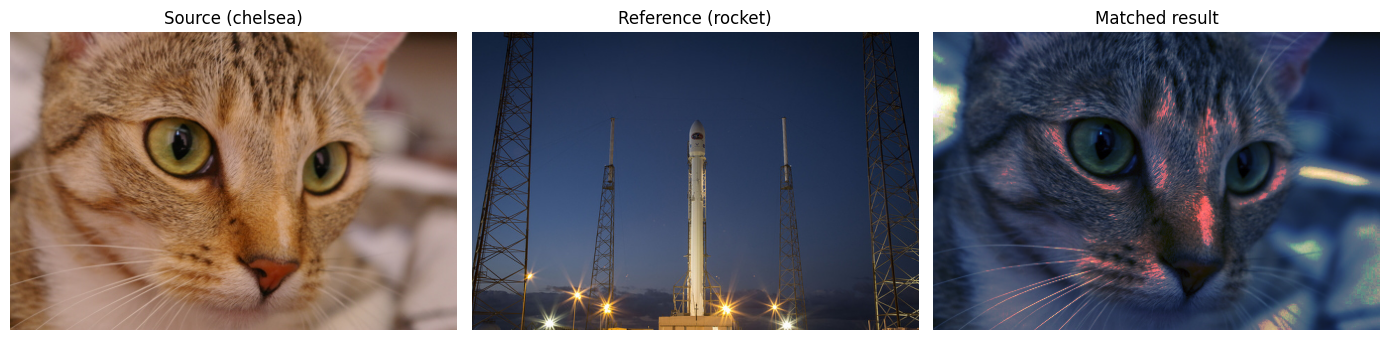

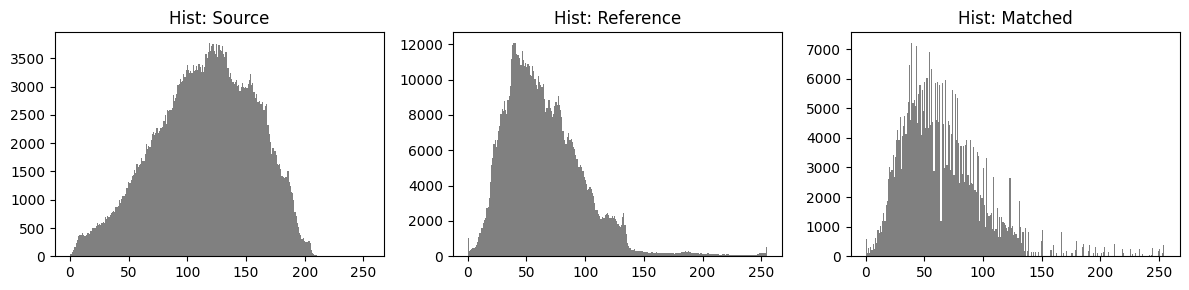

In [15]:
## Histogram Matching (Color Images)
source = data.chelsea()     # Source image 
reference = data.rocket()  # Reference image

# Match the histogram of the source to the reference (per color channel
matched = exposure.match_histograms(source, reference, channel_axis=-1)
matched_u8 = np.clip(matched, 0, 255).astype(np.uint8)

# Display the three images
fig, axes = plt.subplots(1, 3, figsize=(14, 5))

axes[0].imshow(source)
axes[0].set_title('Source (chelsea)')
axes[0].axis('off')

axes[1].imshow(reference)
axes[1].set_title('Reference (rocket)')
axes[1].axis('off')

axes[2].imshow(matched_u8)
axes[2].set_title('Matched result')
axes[2].axis('off')

plt.tight_layout()
plt.show()

# Simple histogram for each color image all of them  combined in one plot
plt.figure(figsize=(12, 3))

plt.subplot(1, 3, 1)
plt.hist(source.ravel(), bins=256, range=(0, 255), color='gray')
plt.title('Hist: Source')

plt.subplot(1, 3, 2)
plt.hist(reference.ravel(), bins=256, range=(0, 255), color='gray')
plt.title('Hist: Reference')

plt.subplot(1, 3, 3)
plt.hist(matched_u8.ravel(), bins=256, range=(0, 255), color='gray')
plt.title('Hist: Matched')

plt.tight_layout()
plt.show()
